# Problem 1
1. print shape.
    - shape is printed.
2. plot linear regression
    - a. printed or ploted with label
    - b. printed or ploted with label
    - c. printed or ploted with label
3. training model with different poly degree
    - a. printed or ploted with label
    - b. printed or ploted with label
    - c. I would recommend poly degree = 7
    
Code and output as follow:

1.1 shape is :  (111, 1) (37, 1) (111,) (37,)
1.2.b theta is : [[ 3.69865502 -0.10240514]]
1.2.c MSE for training data:  0.21066641744012507
1.2.c MSE for test data:  0.12884181810644396


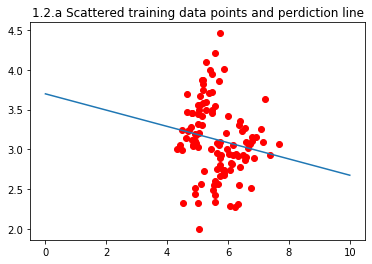

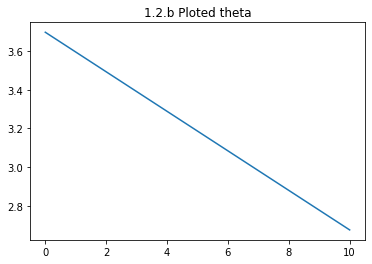

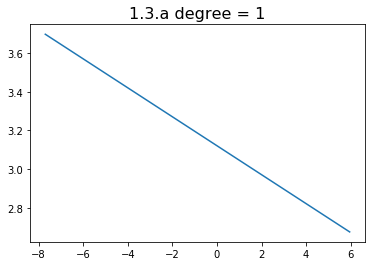

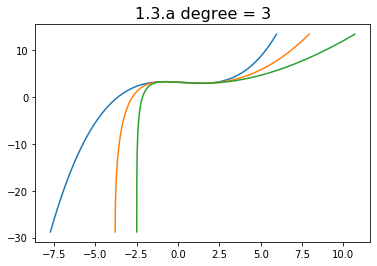

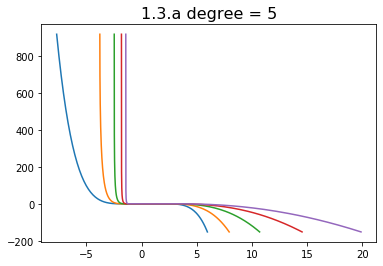

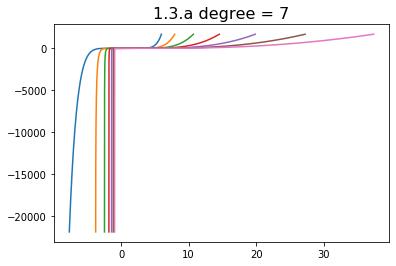

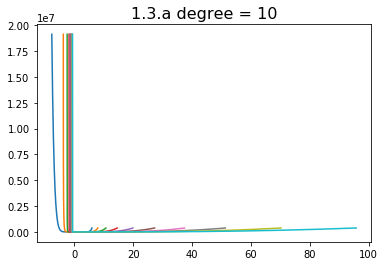

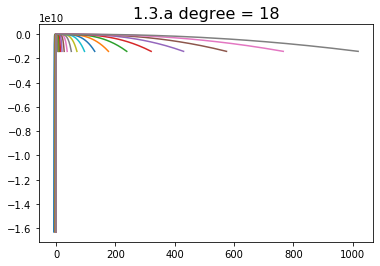

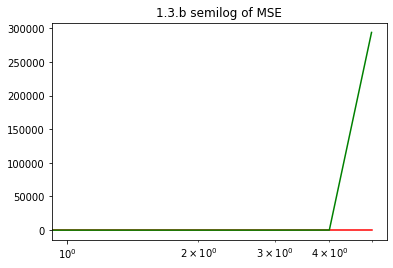

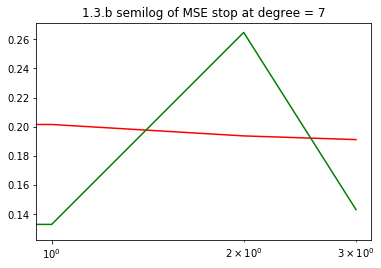

In [1]:
%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("data/iris.txt",delimiter=None)
X = data[:,0]
X = np.atleast_2d(X).T  # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:,1]   # doesn’t matter for Y
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.75)    # split data set 75/25
print('1.1 shape is : ', Xtr.shape,Xte.shape,Ytr.shape,Yte.shape)
#1.1 done

lr = ml.linear.linearRegress( Xtr, Ytr )    # create and train model
def plotLrFunc(lr):
    xs = np.linspace(0,10,200)  # densely sample possible x-values
    xs = xs[:,np.newaxis]   # force "xs" to be an Mx1 matrix (expected by our code)
    ys = lr.predict( xs )   # make predictions at xs
    plt.plot(xs,ys)

plotLrFunc(lr)
plt.title('1.2.a Scattered training data points and perdiction line')
plt.scatter(Xtr,Ytr, color='r')
#1.2.a done

plt.figure()
print('1.2.b theta is :', lr.theta)
xs2 = np.linspace(0,10,200)
ys2 = lr.theta[0][1]*xs2 + lr.theta[0][0]
plt.title('1.2.b Ploted theta')
plt.plot(xs2,ys2)
#1.2.b done

print('1.2.c MSE for training data: ', lr.mse(Xtr,Ytr))
print('1.2.c MSE for test data: ', lr.mse(Xte,Yte))
#1.2.c done

def trainModelDegree(degree, Xtr, Xte, Ytr):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    #  "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    # Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,bias=False), params)
    xs = np.linspace(0,10,200)  # densely sample possible x-values
    xs = xs[:,np.newaxis]   # force "xs" to be an Mx1 matrix (expected by our code)
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,bias=False), params)
    return lr, XtrP, XteP, xsP

degrees = [1, 3, 5, 7, 10, 18]
degreeTrMse = []
degreeTeMse = []
for degree in degrees:
    lrdegree, XtrP, XteP, xsP = trainModelDegree(degree, Xtr, Xte, Ytr)
    plt.figure()
    plt.title('1.3.a degree = '+str(degree), fontsize=16)
    ys = lrdegree.predict(xsP)   # make predictions at xs
    degreeTrMse.append(lrdegree.mse(XtrP,Ytr))
    # print('Training data MSE with degree of ',degree, ': ',lrdegree.mse(XtrP,Ytr))
    degreeTeMse.append(lrdegree.mse(XteP,Yte))
    # print('Test data MSE with degree of ',degree, ': ',lrdegree.mse(XteP,Yte))
    plt.plot(xsP,ys)
#1.3.a done

plt.figure()
plt.title('1.3.b semilog of MSE')
plt.semilogx(degreeTrMse, color='r')
plt.semilogx(degreeTeMse, color='g')
plt.figure()
plt.title('1.3.b semilog of MSE stop at degree = 7')
plt.semilogx(degreeTrMse[:4], color='r')
plt.semilogx(degreeTeMse[:4], color='g')
#1.3.b done
    
plt.show()

# Problem 2
1. printed or ploted with label
2. MSE from 5 fold validation is 0.206 and the MSE with degree from 1,3,5 has similar value. MSE(degree=7) = 0.7 and grows larger after.
3. I would recomment degree = 5 or 7. I took 5 for next part.
4. MSE grows slightly with the growth of number of folds. MSE for traning and test have simialr rate and MSE for test is alway larger.

Code and output as follow:

2.2 Average validation error:  0.20604133336494126


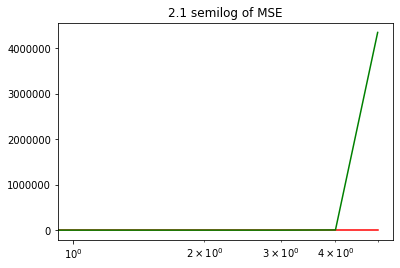

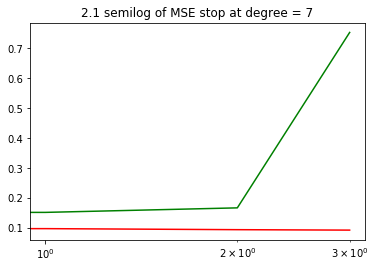

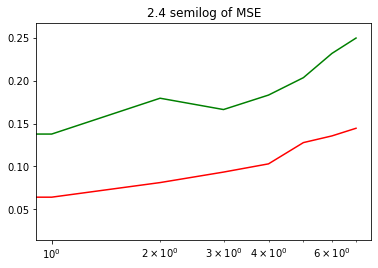

In [2]:
%matplotlib inline
#used to plot in jupyter

import mltools as ml
import sys
import numpy as np
import matplotlib.pyplot as plt

nFolds = 5;
J = [0,0,0,0,0]
for iFold in range(nFolds):
    Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)    # use ith block as validation
    lr = ml.linear.linearRegress( Xti, Yti )   # TODO: train on Xti, Yti, the data for this fold
    J[iFold] = lr.mse(Xti,Yti)  # TODO: now compute the MSE on Xvi, Yvi and save it
                    # the overall estimated validation error is the average of the error on each fold
print('2.2 Average validation error: ', np.mean(J))

def trainModelDegree(degree, Xtr, Xte, Ytr):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    # Rescale the data matrix so that the features have similar ranges / variance
    XtrP,params = ml.transforms.rescale(XtrP)
    #  "params" returns the transformation parameters (shift & scale)
    # Then we can train the model on the scaled feature matrix:
    lr = ml.linear.linearRegress( XtrP, Ytr ) # create and train model
    # Now, apply the same polynomial expansion & scaling transformation to Xtest:
    XteP,_ = ml.transforms.rescale( ml.transforms.fpoly(Xte,degree,bias=False), params)
    xs = np.linspace(0,10,200)  # densely sample possible x-values
    xs = xs[:,np.newaxis]   # force "xs" to be an Mx1 matrix (expected by our code)
    xsP,_ = ml.transforms.rescale( ml.transforms.fpoly(xs,degree,bias=False), params)
    return lr, XtrP, XteP, xsP

def trainDegreeFold(degrees, degreeTrMse, degreeTeMse, nFolds):
    for degree in degrees:
        Jtr = [0,0,0,0,0]
        Jte = [0,0,0,0,0]
        for iFold in range(nFolds):
            Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)  
            lr = ml.linear.linearRegress( Xti, Yti )          
            lrdegree, XtiP, XviP, _ = trainModelDegree(degree, Xti, Xvi, Yti)
            Jtr.append(lrdegree.mse(XtiP,Yti))
            Jte.append(lrdegree.mse(XviP,Yvi))
        degreeTrMse.append(np.mean(Jtr))
        # print('Training data MSE with degree of ',degree, ': ',np.mean(Jtr))
        degreeTeMse.append(np.mean(Jte))
        # print('Test data MSE with degree of ',degree, ': ',np.mean(Jte))

degrees = [1, 3, 5, 7, 10, 18]
degreeTrMse = []
degreeTeMse = []
nFolds= 5
trainDegreeFold(degrees, degreeTrMse, degreeTeMse, nFolds)

plt.title('2.1 semilog of MSE')
plt.semilogx(degreeTrMse, color='r')
plt.semilogx(degreeTeMse, color='g')
plt.figure()
plt.title('2.1 semilog of MSE stop at degree = 7')
plt.semilogx(degreeTrMse[:4], color='r')
plt.semilogx(degreeTeMse[:4], color='g')
#2.1 done

nFolds = [2, 3, 4, 5, 6, 10, 12, 15]
degrees = [5]
degreeTrMse = []
degreeTeMse = []
for nfolds in nFolds:
    trainDegreeFold(degrees, degreeTrMse, degreeTeMse, nfolds)
plt.figure()
plt.title('2.4 semilog of MSE')
plt.semilogx(degreeTrMse, color='r')
plt.semilogx(degreeTeMse, color='g')
#2.4 done
    
plt.show()

# Problem 3
1. prove E[ax+b] = aE[x]+b  
E[ax+b] = ∫(ax+b)p(x)dx = ∫axp(x)dx + ∫bp(x)dx = a∫xp(x)dx + b∫p(x)dx  
since p(x) is probability of x, ∫p(x)dx = 1  
= a∫xp(x)dx + b = aE[X]+b , therefore, its linear.

2. prove var(ax+b) = a^2var(x)  
using conclusion from part 3 which is var(x) = E[x^2] - E[x]^2  
var(ax+b) = E[(ax+b)^2] - E[ax+b]^2 = E[a^2x^2+2abx+b^2] - (aE[x]+b)^2  
based on linear property  
= a^2E[x^2] + 2abE[x] + b^2 - (aE[x])^2 -2abE[x] -b^2 = a^2E[x^2] - (aE[x])^2  
= a^2(E[x^2] - E[x]^2) = a^2var(x), therefore, var(ax+b) = a^2var(x).

3. prove var(x) = E[x^2] - E[x]^2  
var(x) = E[(x-E[x])^2] = E[x^2 - 2E[x]x + E[x]^2]  
based on linear property  
= E[x^2] - 2E[x]E[x] + E[E[x]^2] = E[x^2] -2E[x]^2 + E[x]^2 = E[x^2] - E[x]^2  

# statement of collaboration
I do not have a teammate and did not discuss with anyone.
I do have a problem on test data MSE with high degree since the value is too big.